In [50]:
import os
import pathlib
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix

## Load data and model

In [51]:
# Get path to train file
train_path = os.path.join(pathlib.Path.cwd().parent, "raw", "train.csv")
train_path

'c:\\Users\\bogus\\Desktop\\Projects\\Kaggle competitions\\Introverts\\raw\\train.csv'

In [52]:
# load data
train_df = pd.read_csv(train_path, index_col=0)
train_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert


In [53]:
pipeline = joblib.load("pipeline.pkl")
pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('column_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('minmax',
                                                                                    MinMaxScaler())]),
                                                                   ['Time_spent_Alone',
                                                                    'Social_event_attendance',
                                                                    'Going_outside',
                                                                    'Friends_circle_size',
                                                                    'Post_frequency']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(fill_value='Missing',
                                                                                                  strategy='constant')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  sparse_output=False))]),
                                                                   ['Stage_fear',
                                                                    'Drained_after_socializing'])]))])),
                ('logistic_regression', LogisticRegressionCV(cv=5))])

## Confussion matrix

In [54]:
train_df["Prediction"] = pipeline.predict(train_df)
train_df["Probability"] = pipeline.predict_proba(train_df).max(axis=1)
train_df.head()

C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but O

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,Extrovert,0.984681
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,Extrovert,0.983214
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,Introvert,0.913801
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,Extrovert,0.974179
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,Extrovert,0.972224


C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\bogus\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


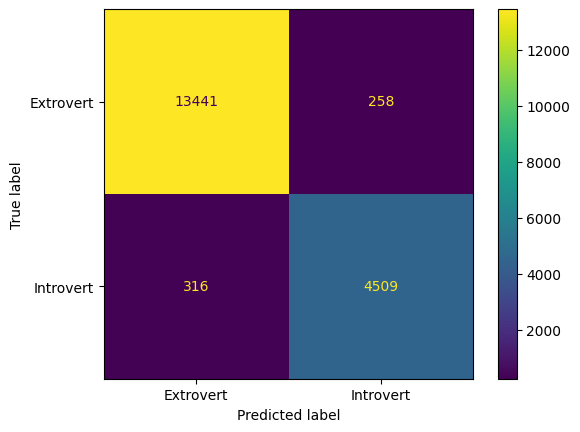

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_estimator(pipeline, train_df, train_df["Personality"])
# confusion_matrix(train_df["Personality"], train_df["Prediction"])

## 20 Most wrong predictions of Extrovert

In [56]:
train_df[
    (train_df["Personality"] != train_df["Prediction"])
    & ( train_df["Prediction"] == "Extrovert")
].sort_values(by="Probability", ascending=False).head(20)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
1873,1.0,No,9.0,7.0,No,15.0,10.0,Introvert,Extrovert,0.993728
13172,NaN,No,10.0,6.0,No,15.0,8.0,Introvert,Extrovert,0.993376
16567,0.0,No,9.0,6.0,No,13.0,9.0,Introvert,Extrovert,0.992532
3657,NaN,No,7.0,6.0,No,15.0,10.0,Introvert,Extrovert,0.992531
338,NaN,No,9.0,6.0,No,13.0,8.0,Introvert,Extrovert,0.991819
16953,1.0,No,9.0,7.0,No,12.0,8.0,Introvert,Extrovert,0.991120
13477,0.0,No,8.0,7.0,No,10.0,9.0,Introvert,Extrovert,0.991024
3558,2.0,No,7.0,7.0,No,14.0,10.0,Introvert,Extrovert,0.990958
1596,0.0,No,9.0,7.0,No,13.0,6.0,Introvert,Extrovert,0.990957


## 20 Most wrong predictions of Introvert

In [57]:
train_df[
    (train_df["Personality"] != train_df["Prediction"])
    & ( train_df["Prediction"] == "Introvert")
].sort_values(by="Probability", ascending=False).head(20)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
1041,11.0,Yes,0.0,1.0,Yes,0.0,0.0,Extrovert,Introvert,0.981202
13225,11.0,Yes,0.0,0.0,Yes,0.0,2.0,Extrovert,Introvert,0.979243
12907,10.0,Yes,0.0,1.0,Yes,1.0,0.0,Extrovert,Introvert,0.977896
13395,11.0,Yes,1.0,0.0,Yes,0.0,2.0,Extrovert,Introvert,0.977075
2751,10.0,Yes,1.0,0.0,Yes,2.0,0.0,Extrovert,Introvert,0.976228
10374,11.0,Yes,0.0,0.0,Yes,NaN,1.0,Extrovert,Introvert,0.975113
4427,11.0,Yes,2.0,0.0,Yes,4.0,0.0,Extrovert,Introvert,0.973724
13344,11.0,Yes,1.0,2.0,Yes,3.0,0.0,Extrovert,Introvert,0.973514
18437,11.0,Yes,0.0,2.0,Yes,0.0,3.0,Extrovert,Introvert,0.973319


## 20 Least wrong predictions of Extrovert

In [58]:
train_df[
    (train_df["Personality"] != train_df["Prediction"])
    & ( train_df["Prediction"] == "Extrovert")
].sort_values(by="Probability", ascending=True).head(20)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
12627,5.0,Yes,3.0,2.0,No,4.0,1.0,Introvert,Extrovert,0.517354
17049,9.0,NaN,3.0,1.0,No,2.0,2.0,Introvert,Extrovert,0.597791
15146,8.0,Yes,3.0,7.0,No,2.0,7.0,Introvert,Extrovert,0.644094
17935,8.0,No,0.0,0.0,No,4.0,0.0,Introvert,Extrovert,0.781445
6283,9.0,NaN,4.0,4.0,No,7.0,6.0,Introvert,Extrovert,0.800727
9462,8.0,No,0.0,5.0,No,3.0,0.0,Introvert,Extrovert,0.836410
15657,8.0,No,3.0,1.0,No,4.0,0.0,Introvert,Extrovert,0.840429
4519,3.0,No,9.0,3.0,NaN,9.0,3.0,Introvert,Extrovert,0.849924
15190,9.0,No,3.0,4.0,No,3.0,2.0,Introvert,Extrovert,0.872991


## 20 Least wrong predictions of Introvert

In [59]:
train_df[
    (train_df["Personality"] != train_df["Prediction"])
    & ( train_df["Prediction"] == "Introvert")
].sort_values(by="Probability", ascending=True).head(20)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
6491,6.0,No,5.0,2.0,Yes,5.0,2.0,Extrovert,Introvert,0.564057
10614,4.0,No,3.0,0.0,Yes,5.0,NaN,Extrovert,Introvert,0.577952
2192,10.0,Yes,2.0,NaN,No,1.0,1.0,Extrovert,Introvert,0.622511
13468,9.0,Yes,0.0,1.0,No,3.0,NaN,Extrovert,Introvert,0.652306
15484,10.0,No,3.0,0.0,Yes,NaN,3.0,Extrovert,Introvert,0.725858
2553,9.0,No,2.0,3.0,Yes,3.0,1.0,Extrovert,Introvert,0.733465
17675,0.0,Yes,4.0,NaN,Yes,12.0,3.0,Extrovert,Introvert,0.744140
1944,8.0,No,0.0,1.0,Yes,4.0,2.0,Extrovert,Introvert,0.754614
7542,0.0,Yes,8.0,4.0,Yes,5.0,3.0,Extrovert,Introvert,0.756325


## Analyse policies with similar

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
encoded = train_df.copy().drop(["Personality", "Prediction", "Probability"], axis=1)
encoded["Stage_fear"] = encoded["Stage_fear"].replace({"Yes": 1, "No": 0})
encoded["Drained_after_socializing"] = encoded["Drained_after_socializing"].replace({"Yes": 1, "No": 0})
encoded = encoded.fillna(-1)
encoded

C:\Users\bogus\AppData\Local\Temp\ipykernel_15580\2931453509.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded["Stage_fear"] = encoded["Stage_fear"].replace({"Yes": 1, "No": 0})
C:\Users\bogus\AppData\Local\Temp\ipykernel_15580\2931453509.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded["Drained_after_socializing"] = encoded["Drained_after_socializing"].replace({"Yes": 1, "No": 0})


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,
0,0.0,0.0,6.0,4.0,0.0,15.0,5.0
1,1.0,0.0,7.0,3.0,0.0,10.0,8.0
2,6.0,1.0,1.0,0.0,-1.0,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0,11.0,5.0
4,1.0,0.0,4.0,4.0,0.0,13.0,-1.0
...,...,...,...,...,...,...,...
18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0
18520,1.0,-1.0,6.0,7.0,0.0,6.0,5.0
18521,7.0,1.0,1.0,1.0,1.0,1.0,-1.0


In [65]:
target = encoded.loc[[6491]]

similarities = cosine_similarity(
    target,
    encoded
)[0]
similarity_series = pd.Series(similarities, index=train_df.index)
similarity_series

id
0        0.726173
1        0.776362
2        0.814480
3        0.871706
4        0.698493
           ...   
18519    0.862556
18520    0.759014
18521    0.733217
18522    0.517940
18523    0.732609
Length: 18524, dtype: float64

In [70]:
#train_df.loc[similarity_series.sort_values()]
train_df.loc[similarity_series.sort_values(ascending=False)[:10].index]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Prediction,Probability
id,,,,,,,,,,
6491,6.0,No,5.0,2.0,Yes,5.0,2.0,Extrovert,Introvert,0.564057
13274,10.0,No,8.0,3.0,No,8.0,3.0,Extrovert,Extrovert,0.931657
9522,10.0,Yes,6.0,3.0,Yes,8.0,3.0,Introvert,Introvert,0.912992
5534,11.0,No,8.0,4.0,No,10.0,5.0,Extrovert,Extrovert,0.946847
714,5.0,Yes,4.0,2.0,Yes,4.0,1.0,Extrovert,Introvert,0.923640
11076,6.0,Yes,4.0,1.0,Yes,5.0,2.0,Introvert,Introvert,0.926763
18207,4.0,Yes,4.0,1.0,Yes,4.0,2.0,Introvert,Introvert,0.914802
16535,5.0,Yes,3.0,2.0,Yes,4.0,2.0,Introvert,Introvert,0.924320
12456,4.0,NaN,3.0,1.0,Yes,4.0,1.0,Introvert,Introvert,0.845403


## Pair Plot of wrong predictions

In [71]:
import seaborn as sns

In [77]:
encoded["Matching"] = train_df["Personality"]==train_df["Prediction"]

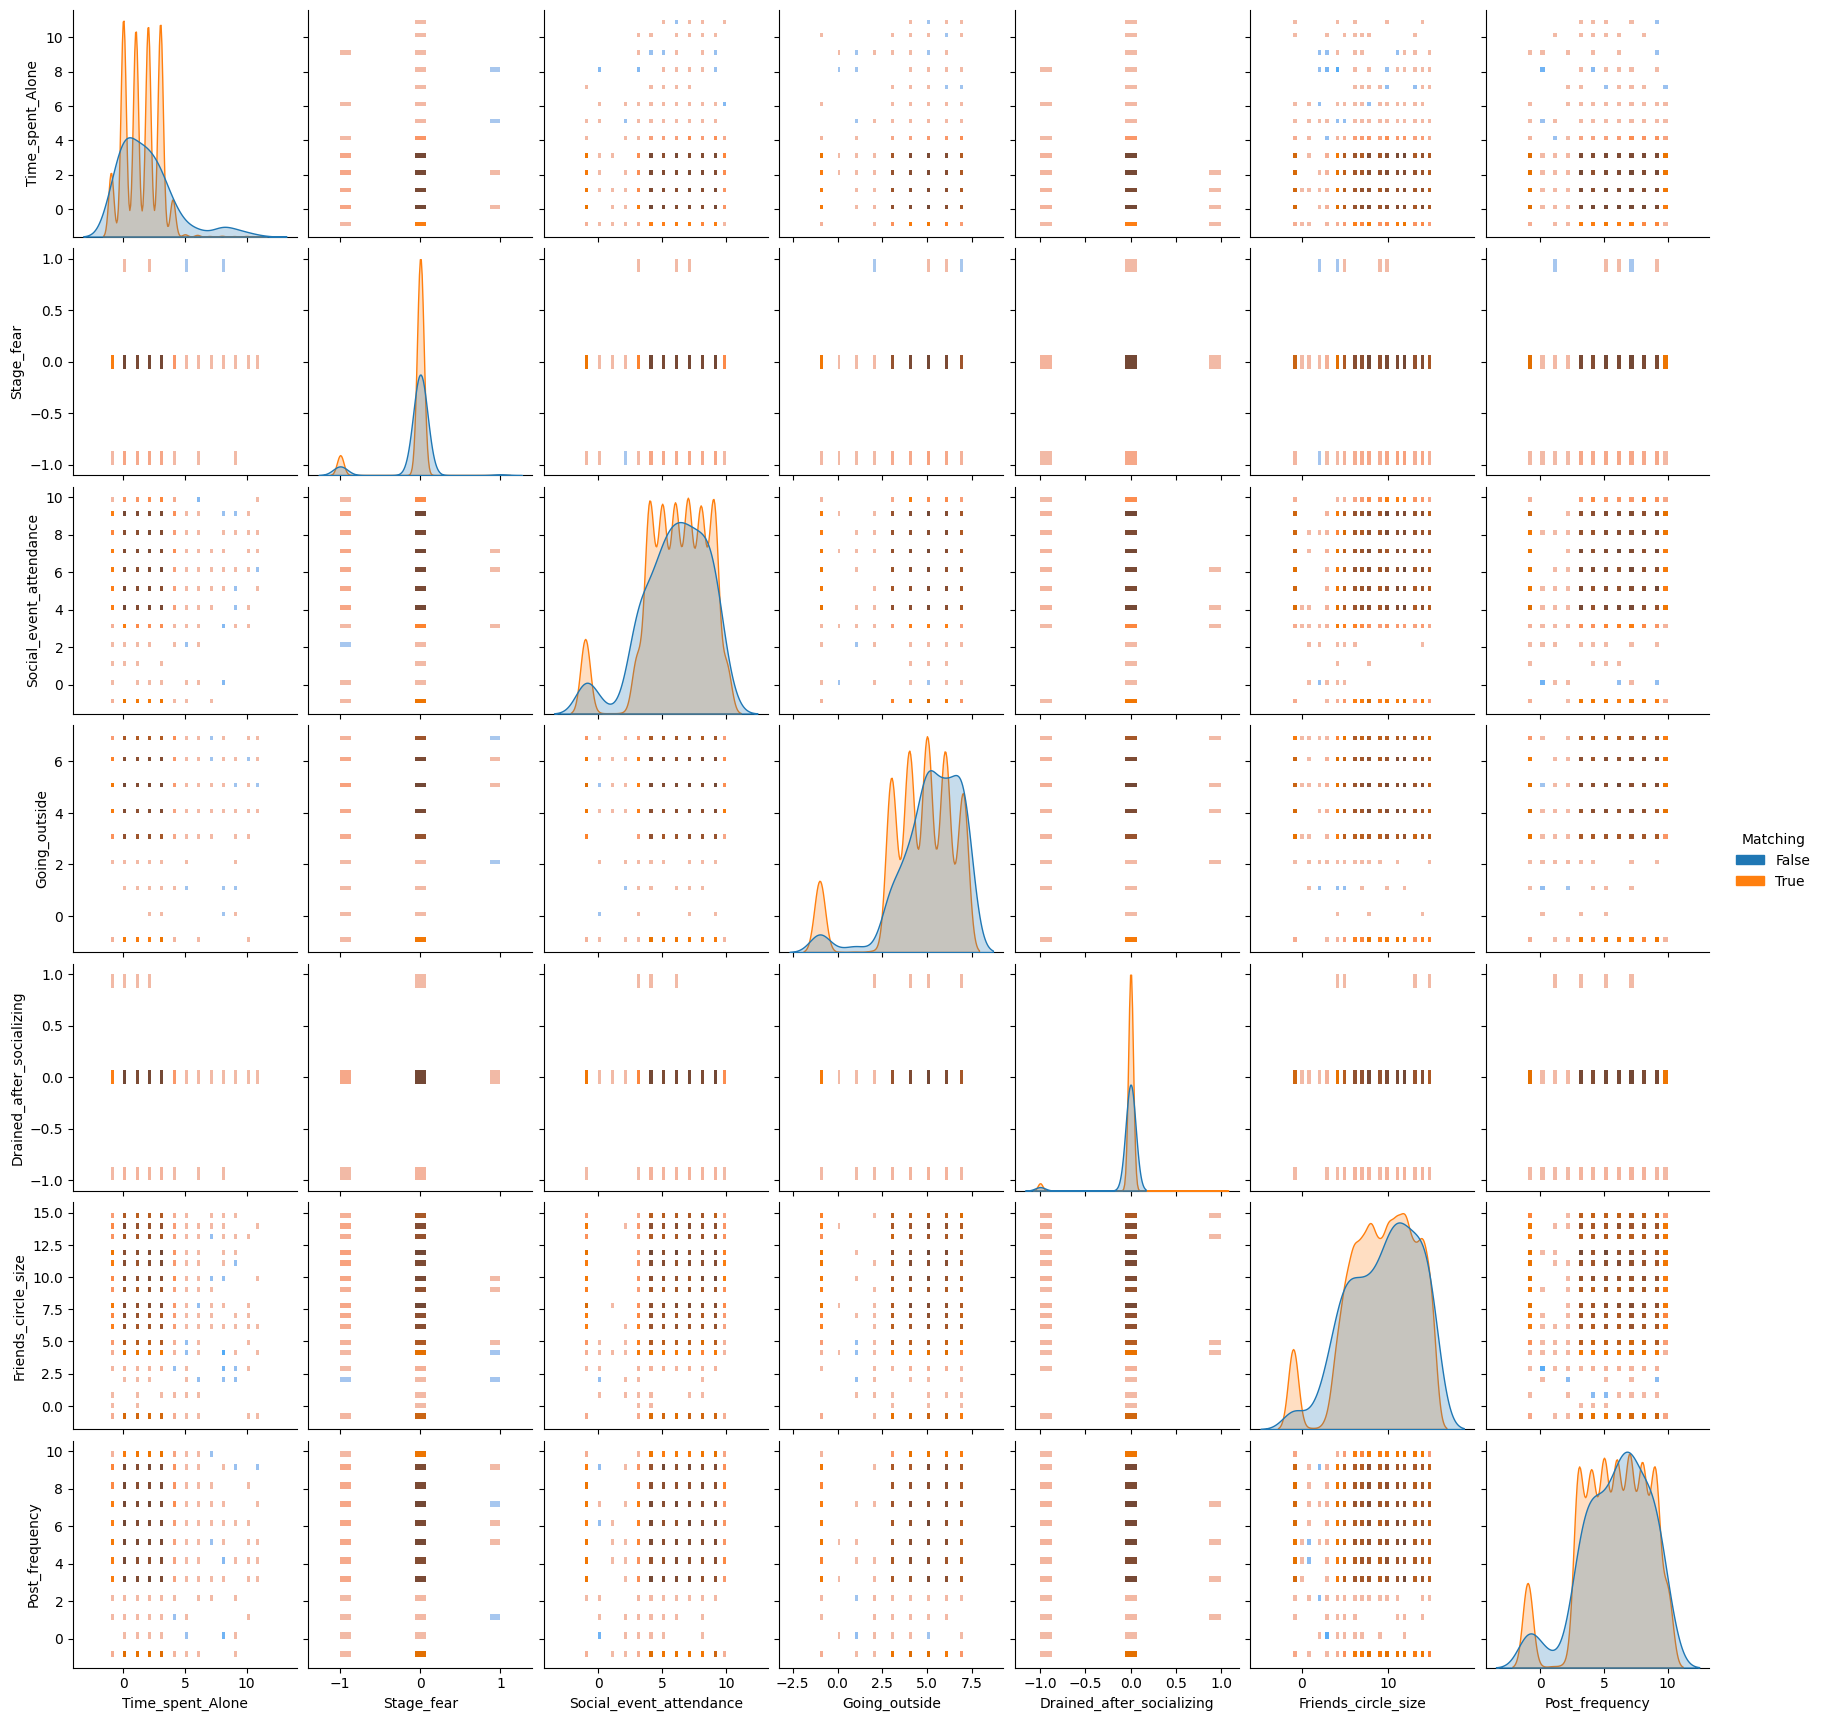

In [85]:
# Pair plot for predicted Extrovert with split if prediction is matching or not
sns.pairplot(
    encoded[train_df["Prediction"] == "Extrovert"],
    kind='hist',
    diag_kind='kde',
    hue="Matching",
    plot_kws={"common_norm": False},
    diag_kws={"common_norm": False}
)

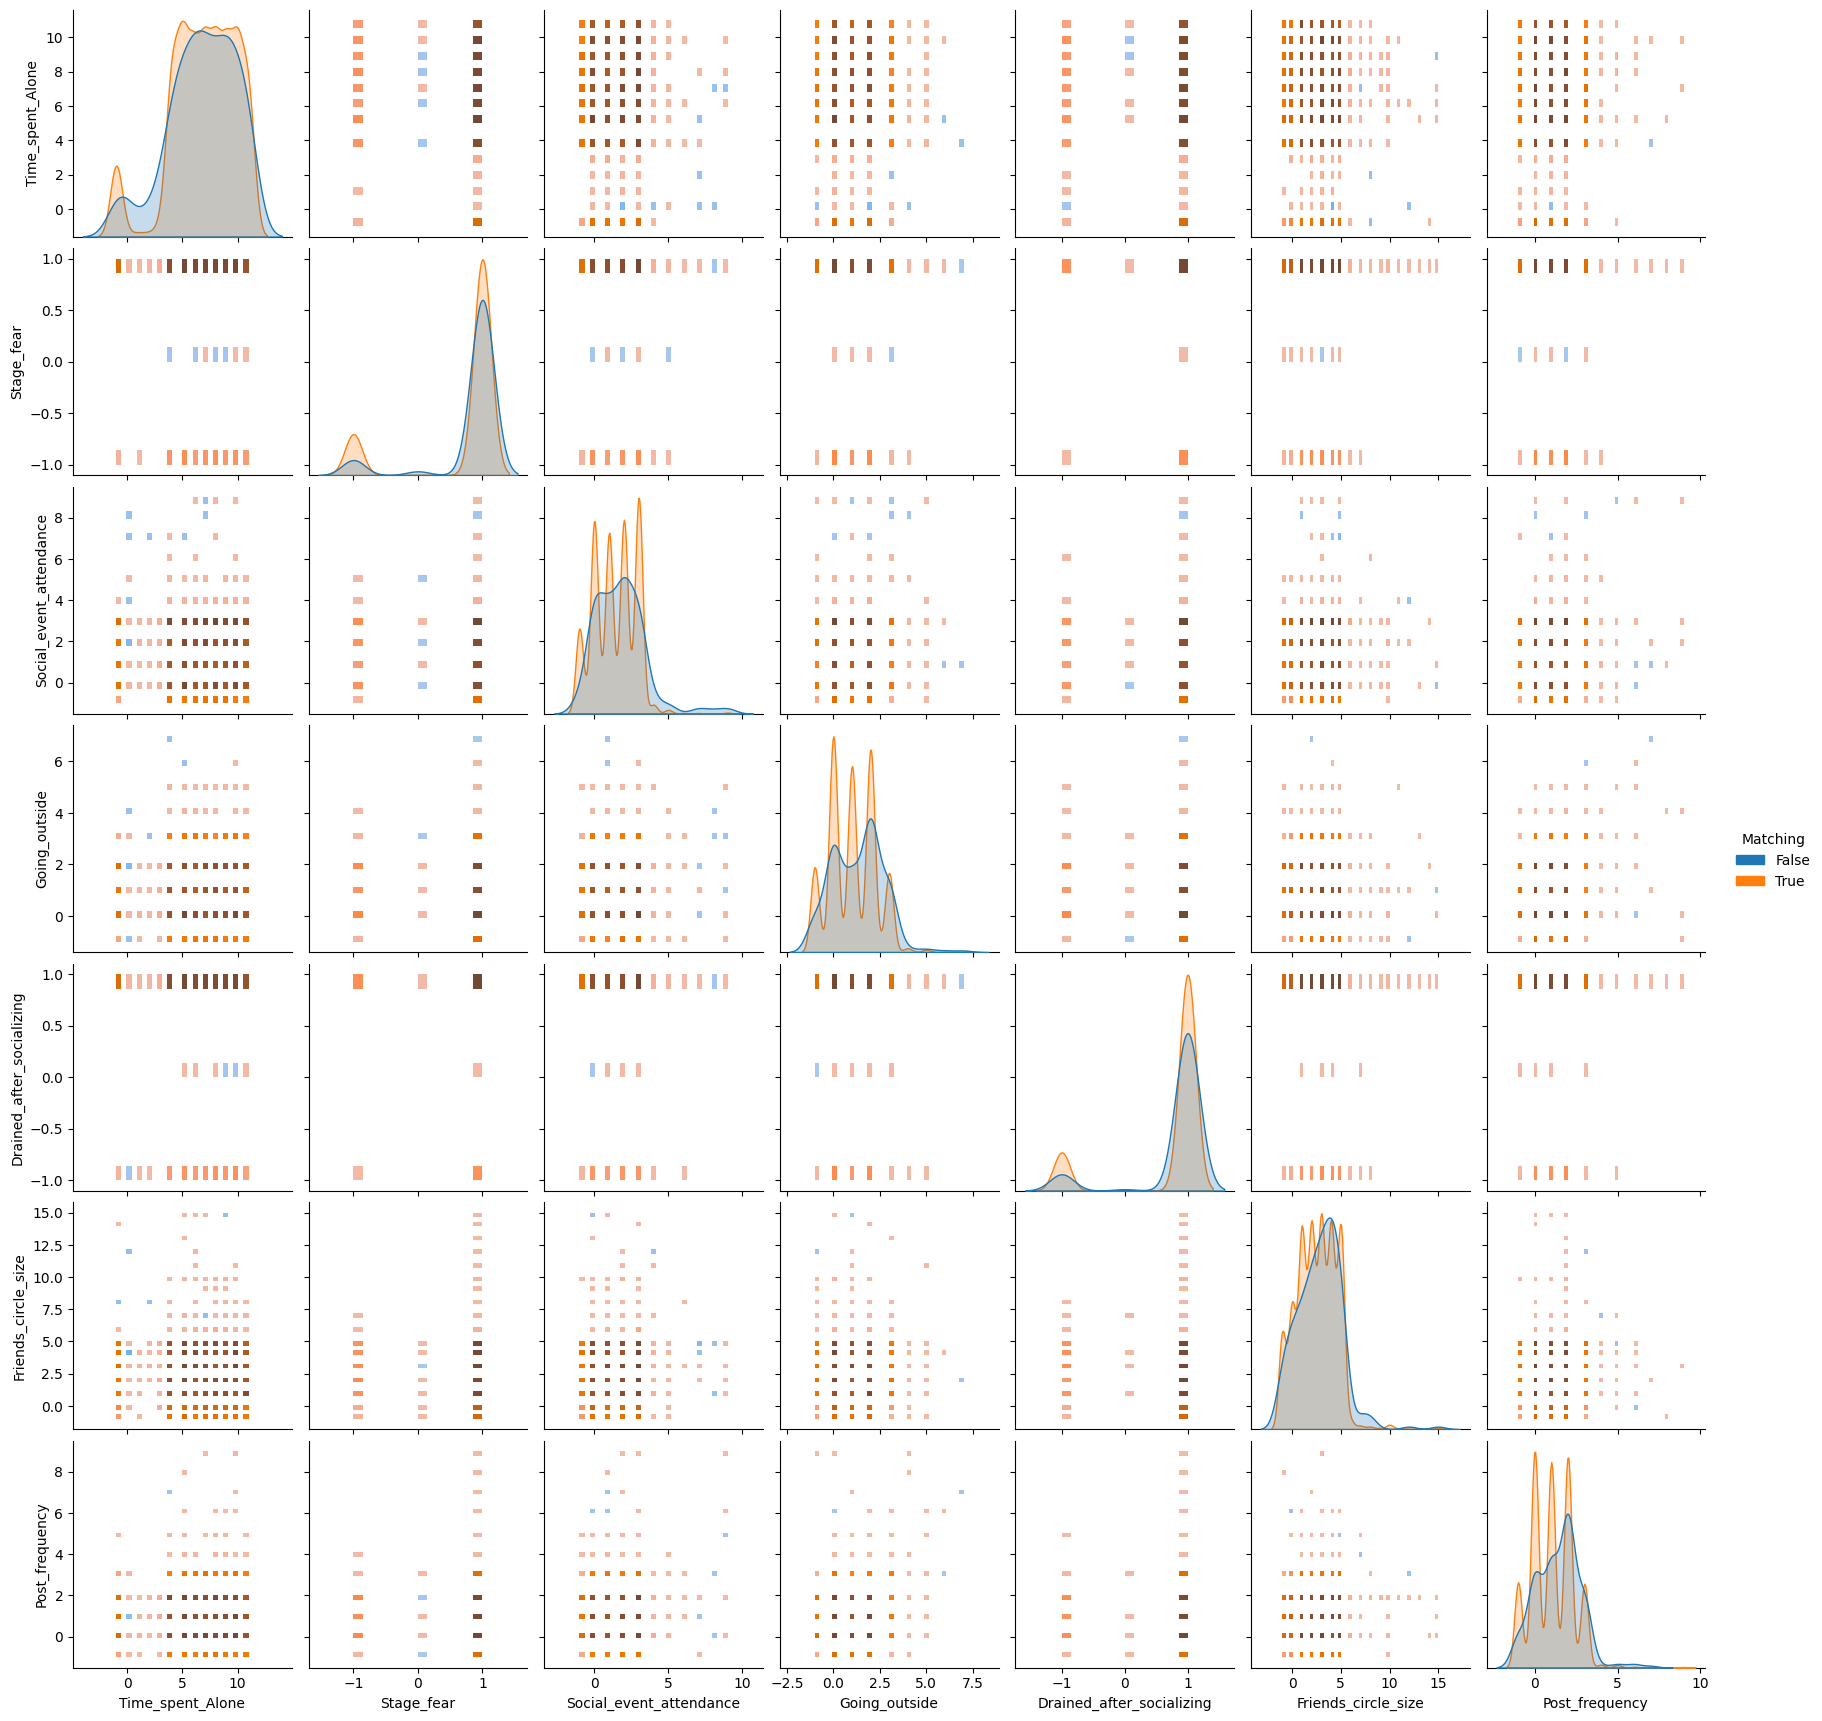

In [86]:
# Pair plot for predicted Introvert with split if prediction is matching or not
sns.pairplot(
    encoded[train_df["Prediction"] == "Introvert"],
    kind='hist',
    diag_kind='kde',
    hue="Matching",
    plot_kws={"common_norm": False},
    diag_kws={"common_norm": False}
)